<a href="https://colab.research.google.com/github/XineohpM/Computational_Physics_PHYS_411/blob/main/PHYS_411_HW4_Xiaoyue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 10.2

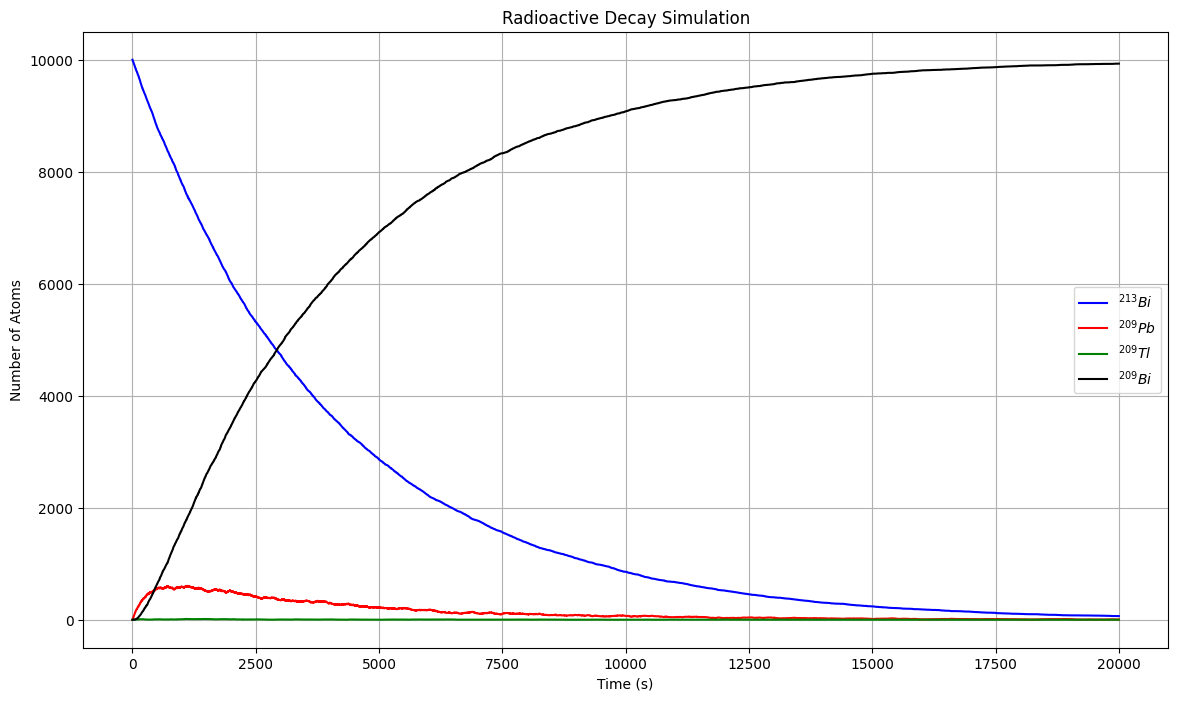

In [11]:
# Estimated running time: 5s
import numpy as np
import matplotlib.pyplot as plt
from random import random


# Constants
t_Bi = 46 * 60 # s
t_Pb = 3.3 * 60 # s
t_Tl = 2.2 * 60 # s
N = 10000 # atom
dt = 1 # s
total_time = 20000 # s

t = np.arange(0, total_time, dt)

# Initialization
Bi_213 = N
Bi_209 = 0
Pb = 0
Tl = 0

Bi_213_list = np.zeros(total_time)
Pb_list = np.zeros(total_time)
Tl_list = np.zeros(total_time)
Bi_209_list = np.zeros(total_time)

def Bi_decay():
    p_Bi = 1 - 2 ** (-dt / t_Bi)
    d_Bi_213 = 0
    d_Pb = 0
    d_Tl = 0
    for i in range(Bi_213):
        if random() < p_Bi:
            d_Bi_213 -= 1
            if random() < 0.9791:
                d_Pb += 1
            else:
                d_Tl += 1
    return d_Bi_213, d_Pb, d_Tl

def Tl_decay():
    p_Tl = 1 - 2 ** (-dt / t_Tl)
    d_Tl = 0
    d_Pb = 0
    for i in range(Tl):
        if random() < p_Tl:
            d_Tl -= 1
            d_Pb += 1
    return d_Tl, d_Pb

def Pb_decay():
    p_Pb = 1 - 2 ** (-dt / t_Pb)
    d_Pb = 0
    d_Bi_209 = 0
    for i in range(Pb):
        if random() < p_Pb:
            d_Pb -= 1
            d_Bi_209 += 1
    return d_Pb, d_Bi_209


for t_i in t:
    Bi_213_list[t_i] = Bi_213
    Pb_list[t_i] = Pb
    Tl_list[t_i] = Tl
    Bi_209_list[t_i] = Bi_209

    d_Bi_213, d_Pb, d_Tl = Bi_decay()
    Bi_213 += d_Bi_213
    Pb += d_Pb
    Tl += d_Tl

    d_Tl, d_Pb = Tl_decay()
    Tl += d_Tl
    Pb += d_Pb

    d_Pb, d_Bi_209 = Pb_decay()
    Pb += d_Pb
    Bi_209 += d_Bi_209

plt.figure(figsize = (14, 8))
plt.plot(Bi_213_list, label = '$^{213}Bi$', color = 'blue')
plt.plot(Pb_list, label = '$^{209}Pb$', color = 'red')
plt.plot(Tl_list, label = '$^{209}Tl$', color = 'green')
plt.plot(Bi_209_list, label = '$^{209}Bi$', color = 'black')
plt.title('Radioactive Decay Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Number of Atoms')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 10.3

<ipython-input-26-99496911bb11>:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)


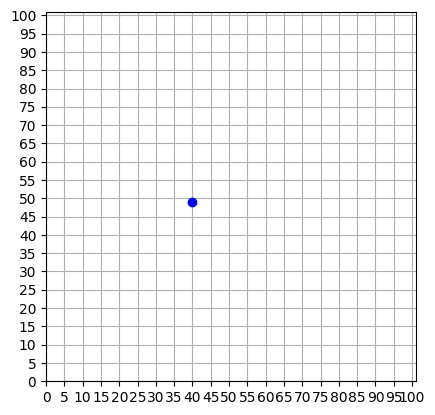

In [26]:
# Estimated running time: 11s (total_frames = 75)
import numpy as np
import matplotlib.pyplot as plt
from random import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# Constants
L = 101
total_frames = 75 # @param {type:"slider", min:1, max:500, step:1}

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.grid(True)
ax.set_xticks(np.arange(0, L, 5))
ax.set_yticks(np.arange(0, L, 5))

point, = ax.plot([], [], 'bo')

# Initialization
x, y = (L - 1) / 2, (L - 1) / 2

def random_walk(x, y):
    a = random()

    # Right
    if a < 0.25:
        dx = 1
        dy = 0
    # Left
    elif a < 0.5:
        dx = -1
        dy = 0
    # Up
    elif a < 0.75:
        dx = 0
        dy = 1
    # Down
    else:
        dx = 0
        dy = -1

    if 0 <= x + dx < L and 0 <= y + dy < L:
        return x + dx, y + dy
    else:
        return random_walk(x, y)


def init():
    point.set_data([(L - 1) / 2], [(L - 1) / 2])
    return point,

def update(frame):
    global x, y  # Use global variables to maintain state
    x, y = random_walk(x, y)
    point.set_data(x, y)
    return point,

ani = FuncAnimation(fig, update, frames = range(total_frames), init_func = init, blit = True, interval=500)
video = ani.to_html5_video()
html = HTML(video)
display(html)

## Exercise 10.4

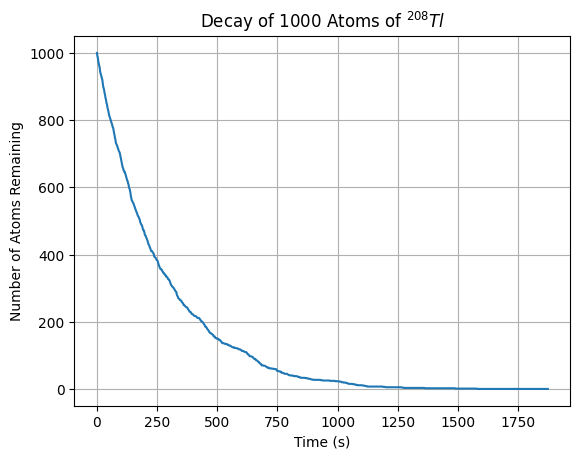

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
N = 1000 # atom
t_Tl = 3.053 * 60

u = np.random.uniform(0, 1, N)

decay_time = -t_Tl * np.log(1 - u) / np.log(2)

sorted_times = np.sort(decay_time)

times = np.linspace(0, sorted_times.max(), 1000)
not_decayed = 1000 - np.searchsorted(sorted_times, times)

plt.plot(times, not_decayed)
plt.xlabel('Time (s)')
plt.ylabel('Number of Atoms Remaining')
plt.title('Decay of 1000 Atoms of $^{208}Tl$')
plt.grid(True)
plt.show()

## Exercise 10.5

**(a)**

In [20]:
import numpy as np


def integrand(x):
    return (np.sin(1 / (x * (2 - x)))) ** 2

# Constants
N = 10000
area = 2 * 1
real_integral = 1.4514

sum = 0

for i in range(N):
    x = 2 * np.random.rand()
    y = np.random.rand()
    if y < integrand(x):
       sum += 1

integral = sum * area / N
error = (integral - real_integral) / real_integral

print("The estimated integral of this function is", integral, ", the relative error is", error * 100, "%")

The estimated integral of this function is 1.4544 , the relative error is 0.20669698222405206 %


**(b)**

In [26]:
sum = 0

for i in range(N):
    x = 2 * np.random.rand()
    sum += integrand(x)

integral = 2 * sum / N
error = (integral - real_integral) / real_integral

print("The estimated integral of this function is", integral, ", the relative error is", error * 100, "%")

The estimated integral of this function is 1.457778882674766 , the relative error is 0.4394985996118189 %
